# Modelos de Regresión Lineal
## Modelo con datos simulados
* y= a + b * x
* x : 100 valores distribuidos según una N(1.5, 2.5)
* Yestimada = 5 + 1.1 * x + e
* e : estará distribuida según una N(0, 0.8)

In [201]:
import pandas as pd
import numpy as np

In [202]:
x = 1.5 + 2.5 * np.random.randn(100)

In [203]:
res = 0 + 0.8 * np.random.randn(100)

In [204]:
y_prediccion = 5 + 1.1 * x

In [205]:
y_act = 5 + 1.1 * x + res

In [206]:
x_list = x.tolist()
y_pred_list = y_prediccion.tolist()
y_act_list = y_act.tolist()

In [207]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
        
    }
)

In [208]:
data

,x,y_actual,y_prediccion
0,1.871245,7.056189,7.058369
1,2.045640,5.945999,7.250204
2,3.759038,9.055909,9.134941
3,2.799086,8.390041,8.078995
4,0.809931,5.047534,5.890924
...,...,...,...
95,6.464169,13.867823,12.110585
96,4.521749,9.679750,9.973924
97,2.603534,8.971126,7.863887
98,0.123907,5.143721,5.136298


In [209]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

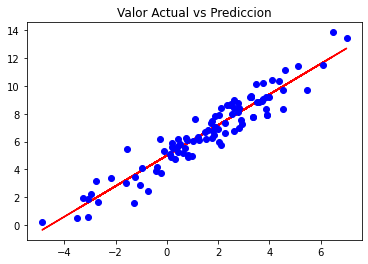

In [210]:
plt.plot(x,y_prediccion, "r") #5 + 1.1 * x 
plt.plot(x,y_act, "bo") #5 + 1.1 * x + res
plt.title("Valor Actual vs Prediccion")

In [211]:
y_mean = [np.mean(y_act) for i in range (1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

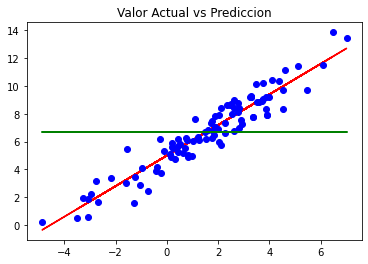

In [212]:
plt.plot(x,y_prediccion, "r") #5 + 1.1 * x 
plt.plot(x,y_act, "bo") #5 + 1.1 * x + res
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Prediccion")

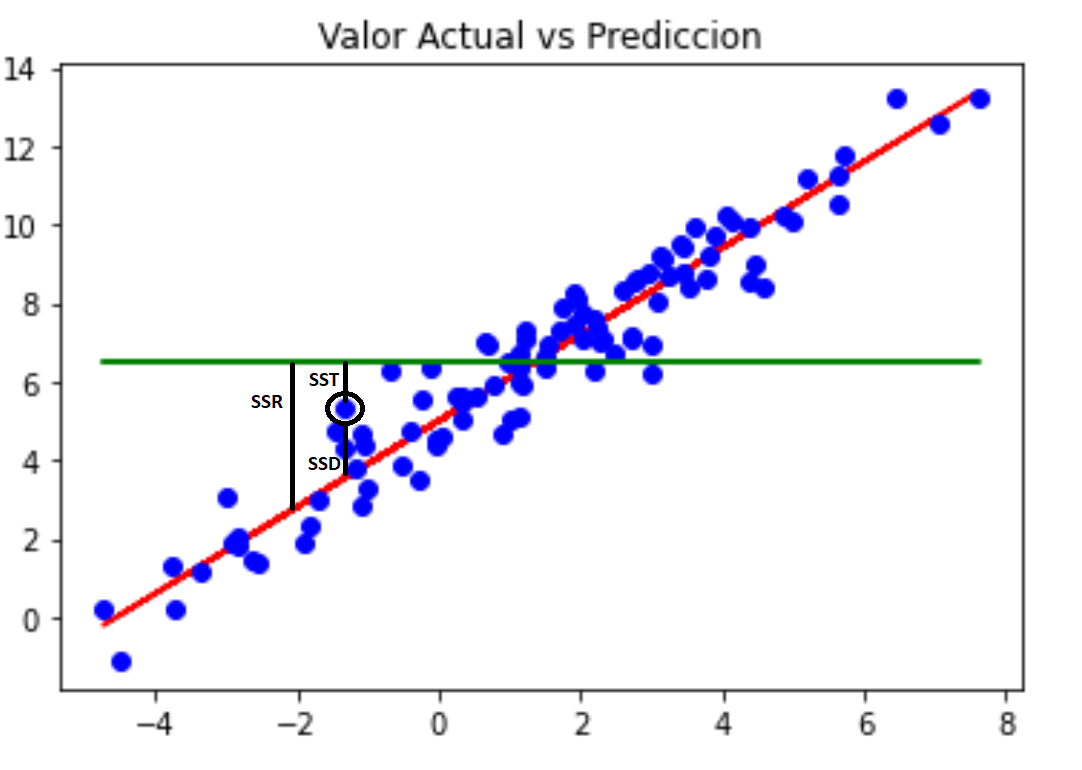

In [213]:
from IPython.display import Image
Image(filename="../resources/regresion1.png")

El punto azul es un valor observado del modelo actual (y_act)

La distancia entre el valor observado y el modelo (linea roja) se denomina SSD (Suma de los cuadrados de las diferencias)

La distancia entre el valor observado y el promedio (linea verde) se denomina SST (Suma de los cuadrados totales)

La distancia entre el modelo (linea roja) y el promedio (linea verde) Se denomina SSR (Suma de los cuadrados de la regresión)

SST = SSR + SSD

SSR tendria que ser mas grande que SSD, tanto asi que sea SST == SSR

R^2 = SSR/SST

un modelo con R^2 cercano a 1 es mas relevante

In [214]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2 # diferencia entre la regresion y el promedio
data["SSD"] = (data["y_actual"]- data["y_prediccion"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2


In [215]:
data

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.871245,7.056189,7.058369,0.116242,0.000005,0.114760
1,2.045640,5.945999,7.250204,0.283852,1.700950,0.595100
2,3.759038,9.055909,9.134941,5.844382,0.006246,5.468504
3,2.799086,8.390041,8.078995,1.853870,0.096750,2.797641
4,0.809931,5.047534,5.890924,0.683105,0.711306,2.788538
...,...,...,...,...,...,...
95,6.464169,13.867823,12.110585,29.086170,3.087885,51.128186
96,4.521749,9.679750,9.973924,10.604783,0.086539,8.775365
97,2.603534,8.971126,7.863887,1.314374,1.225977,5.079164
98,0.123907,5.143721,5.136298,2.499965,0.000055,2.476547


In [216]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [217]:
SSR

642.3334469998213

In [218]:
SSD

68.21867362002388

In [219]:
SST

721.7302152486664

In [220]:
SSR+SSD

710.5521206198451

In [221]:
R2 = SSR/SST

In [222]:
R2

0.8899910706641406

La preddicion de y es un valor bastante asertado

In [223]:
SSD2 = data["SSD"] = (data["y_actual"]- data["y_prediccion"])

(array([ 3.,  5., 13., 10., 24., 14., 17., 10.,  2.,  2.]),
 array([-1.97324184, -1.56208135, -1.15092087, -0.73976039, -0.32859991,
         0.08256058,  0.49372106,  0.90488154,  1.31604202,  1.72720251,
         2.13836299]),
 <BarContainer object of 10 artists>)

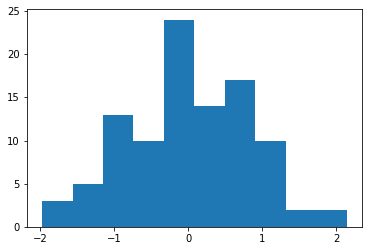

In [224]:
plt.hist(SSD2)

# Ahora obtendremos una recta a partir de un modelo
## Vamos a obtener ahora la recta de regresión

* y = a + b * x
* b = sum((xi-xm)*(yi-ym)/ sum((xi-xm)^2)
* a = ym - b * xm

In [225]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean,y_mean

(1.5682467817308525, 6.717425807620839)

In [226]:
data["numerador_beta"] = ((data["x"]-x_mean)*(data["y_actual"]-y_mean))
data["denominador_beta"] = (data["x"]-x_mean)**2

In [227]:
beta = sum(data["numerador_beta"]/sum(data["denominador_beta"]))

In [228]:
alpha = y_mean - beta * x_mean

In [239]:
alpha, beta

(4.977328385783096, 1.109581375908976)

Esto indica que el modelo será


In [246]:
a = " y =  " + str(alpha) + " + " + str(beta) + " * X"
a

' y =  4.977328385783096 + 1.109581375908976 * X'

In [230]:
data["y_model"] = alpha + beta * data["x"]

In [231]:
data

,x,y_actual,y_prediccion,SSR,SSD,SST,numerador_beta,denominador_beta,y_model
0,1.871245,7.056189,7.058369,0.116242,-0.002180,0.114760,0.102644,0.091808,7.053627
1,2.045640,5.945999,7.250204,0.283852,-1.304205,0.595100,-0.368274,0.227904,7.247132
2,3.759038,9.055909,9.134941,5.844382,-0.079032,5.468504,5.123128,4.799564,9.148287
3,2.799086,8.390041,8.078995,1.853870,0.311046,2.797641,2.058721,1.514966,8.083142
4,0.809931,5.047534,5.890924,0.683105,-0.843390,2.788538,1.266305,0.575043,5.876013
...,...,...,...,...,...,...,...,...,...
95,6.464169,13.867823,12.110585,29.086170,1.757238,51.128186,35.007787,23.970050,12.149849
96,4.521749,9.679750,9.973924,10.604783,-0.294174,8.775365,8.749233,8.723178,9.994577
97,2.603534,8.971126,7.863887,1.314374,1.107239,5.079164,2.333227,1.071819,7.866161
98,0.123907,5.143721,5.136298,2.499965,0.007423,2.476547,2.272964,2.086116,5.114814


In [232]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [233]:
SSR, SSD, SST

(653.5661206577829, 68.1640945908838, 721.7302152486664)

In [234]:
R2_nuevo = SSR / SST

In [235]:
R2_nuevo

0.9055546059306966

In [236]:
R2, R2_nuevo

(0.8899910706641406, 0.9055546059306966)

Es un poco mejor el nuevo

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

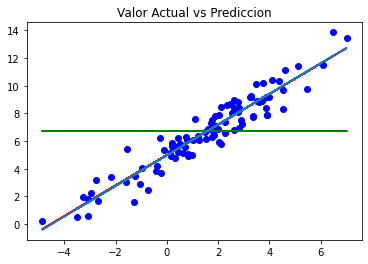

In [237]:
y_mean2 = [np.mean(y_act) for i in range (1, len(x_list) + 1)]

plt.plot(data["x"],data["y_prediccion"], "r") #5 + 1.1 * x 
plt.plot(data["x"],data["y_actual"], "bo") #5 + 1.1 * x + res
plt.plot(data["x"],y_mean2, "g")
plt.plot(data["x"],data["y_model"]) # <----- otra recta muy ensimada puesto que una es representativa en 0.95 y la otra 0.93

plt.title("Valor Actual vs Prediccion")

## ¿ Que otros estadisticos aparte de R^2 podemos observar para determinar la eficacia de una regresión?

### Error estándar de los residuos (RSE)

In [252]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE # cuanto menor sea mejor

0.833997593294647

In [253]:
np.mean(data["y_actual"])

6.717425807620839

In [254]:
RSE / np.mean(data["y_actual"])

0.12415434381850361

In [255]:
# se observa incrementos de un entorno del 12% del error debido al uso del modelo